<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="center"><font color=white>KLASIFIKASI TRANSAKSI UNTUNG/RUGI BERDASARKAN DATA TRANSAKSI SUPERSTORE MENGGUNAKAN METODE SUPERVISED LEARNING RANDOM FOREST CLASSIFICATION
</font></h2>

<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Data Source:</font></h2>

* https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset?resource=download

<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Keterangan:</font></h2>

Supervised Learning menggunakan algoritma machine learning Random Forest.

# Import Libraries

In [ ]:
import pandas as pd # atur data frame
import matplotlib.pyplot as plt # visualisasi
import seaborn as sns # visualisasi

from sklearn.preprocessing import LabelEncoder # Preprocessing Data Mengubah data kategorikal (teks) menjadi angka.
from sklearn.preprocessing import StandardScaler # Preprocessing Data Menstandardisasi data numerik ke bentuk dengan rata-rata 0 dan standar deviasi 1

from sklearn.model_selection import train_test_split # membagi data menjadi data latih (training) dan data uji (testing)
from sklearn.ensemble import RandomForestClassifier # algoritma klasifikasi Random Forest
from sklearn.metrics import classification_report, confusion_matrix # Evaluasi Model

import numpy as np # Mengelola array

**Penjelasan:**

* pandas: Buat ngatur data bentuk tabel (DataFrame)
* train_test_split: Buat bagi data jadi latih dan uji
* RandomForestRegressor: Algoritma Machine Learning yang kita pakai
* mean_squared_error dan r2_score: Buat ngecek seberapa bagus modelnya

# Load Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Load the data google drive
df = pd.read_csv('/content/drive/My Drive/Data Analyst_Telkom/Penambangan Data/TUBES/SuperStoreOrders.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011


In [ ]:
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 2, 3, 4]})
df = df.dropna (thresh=2)

In [ ]:
df

,A,B
1,2.0,2.0
3,4.0,4.0


# DATA EXPLORATION

1. Menampilkan informasi umum mengenai dataset (jumlah baris dan kolom, nama atribut, tipe data).
2. Mengidentifikasi nilai yang hilang (missing values) dan outlier.
3. Melakukan analisis statistik deskriptif untuk variabel numerik (mean, median, standard deviation, dll).
4. Membuat visualisasi awal (misalnya: histogram, boxplot, scatterplot, correlation matrix) untuk melihat distribusi dan hubungan antar variabel.

## 1 || Menampilkan informasi umum dataset

In [ ]:
# Menampilkan semua data
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [ ]:
# Menampilkan 5 baris pertama
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [ ]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [ ]:
df.shape # Menghasilkan (jumlah_baris, jumlah_kolom)

(51290, 21)

## 2 || Cek Missing values & Outlier

In [ ]:
# Cek missing values
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Keterangan:</font></h2>

* _Tidak ada data yang hilang_

In [ ]:
# Kolom 'sales' yang tadinya object diubah ke float
df['sales'] = df['sales'].replace('[\$,]', '', regex=True).astype(float)

# Mengganti semua tanda (/) menjadi (-) di kolom order_date dan ship_date
df['order_date'] = df['order_date'].str.replace('/', '-', regex=False)
df['ship_date'] = df['ship_date'].str.replace('/', '-', regex=False)

# Ubah kolom tanggal dari string ke format datetime dengan format='%d-%m-%Y' (supaya bisa diolah)
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d-%m-%Y')

In [ ]:
# CEK TABEL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [ ]:
# CEK OUTLIER ['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'shipping_days', 'year']

# Pilih kolom numerik saja dari dataset
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Deteksi outlier pakai metode IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)       # Kuartil 1
    Q3 = df[col].quantile(0.75)       # Kuartil 3
    IQR = Q3 - Q1                          # Rentang antar kuartil
    batas_bawah = Q1 - 1.5 * IQR           # Batas bawah
    batas_atas = Q3 + 1.5 * IQR           # Batas atas

    # Ambil baris yang termasuk outlier
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]

    # Tampilkan hasil outlier + jumlahnya
    if not outliers.empty:
        print(f"\nOutliers di kolom '{col}':")
        print(outliers[[col]])
        print(f"Jumlah outlier di '{col}': {len(outliers)} data\n")
    else:
        print(f"Tidak ada outlier di kolom '{col}'")


Outliers di kolom 'sales':
        sales
8       912.0
9       667.0
12      854.0
27     1648.0
43     3029.0
...       ...
51229  1091.0
51230   866.0
51231  1049.0
51232   867.0
51239   685.0

[5655 rows x 1 columns]
Jumlah outlier di 'sales': 5655 data


Outliers di kolom 'quantity':
       quantity
126          10
180          11
183          12
185          12
213          11
...         ...
51043        10
51045        12
51149        10
51161        14
51258        12

[877 rows x 1 columns]
Jumlah outlier di 'quantity': 877 data


Outliers di kolom 'discount':
       discount
11         0.55
33         0.60
49         0.80
85         0.60
87         0.60
...         ...
51225      0.70
51226      0.70
51231      0.57
51249      0.60
51274      0.60

[4172 rows x 1 columns]
Jumlah outlier di 'discount': 4172 data


Outliers di kolom 'profit':
         profit
0      106.1400
7      110.4120
8     -319.4640
9      253.3200
10    -122.8005
...         ...
51239  -63.2340
51245  1

In [ ]:
# Hapus outlier kecuali 'profit' karena mau dijadiin target
kolom_outlier = ['sales', 'quantity', 'discount', 'shipping_cost']

def get_outlier_mask(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    bawah = Q1 - 1.5 * IQR
    atas = Q3 + 1.5 * IQR
    return (df[kolom] >= bawah) & (df[kolom] <= atas)

# Buat filter TRUE / FALSE untuk semua kolom outlier
mask = pd.Series(True, index=df.index)
for kolom in kolom_outlier:
    mask &= get_outlier_mask(df, kolom)

# Simpan data yang bersih
df_clean = df[mask]
print("Jumlah data setelah buang outlier:", len(df_clean))

Jumlah data setelah buang outlier: 39492


In [ ]:
# CEK
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39492 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        39492 non-null  object        
 1   order_date      39492 non-null  datetime64[ns]
 2   ship_date       39492 non-null  datetime64[ns]
 3   ship_mode       39492 non-null  object        
 4   customer_name   39492 non-null  object        
 5   segment         39492 non-null  object        
 6   state           39492 non-null  object        
 7   country         39492 non-null  object        
 8   market          39492 non-null  object        
 9   region          39492 non-null  object        
 10  product_id      39492 non-null  object        
 11  category        39492 non-null  object        
 12  sub_category    39492 non-null  object        
 13  product_name    39492 non-null  object        
 14  sales           39492 non-null  float64       
 15  quantit

## 3 || Analisis statistik deskriptif

In [ ]:
# Statistik untuk variable Numerik seperti count, mean, std, min, max, dll.
df_clean.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,39492,39492,39492.000000,39492.000000,39492.000000,39492.000000,39492.000000,39492.000000
mean,2013-05-15 15:01:57.046490368,2013-05-19 15:49:51.795806720,115.205535,3.173048,0.098152,16.337717,10.962606,2012.786767
min,2011-01-01 00:00:00,2011-01-03 00:00:00,1.000000,1.000000,0.000000,-522.090000,0.000000,2011.000000
25%,2012-06-25 00:00:00,2012-06-29 00:00:00,29.000000,2.000000,0.000000,1.720000,2.420000,2012.000000
50%,2013-07-16 00:00:00,2013-07-20 00:00:00,67.000000,3.000000,0.000000,9.135700,6.250000,2013.000000
75%,2014-05-26 00:00:00,2014-05-30 00:00:00,158.000000,4.000000,0.200000,27.285150,15.250000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,581.000000,9.000000,0.500000,284.220000,57.200000,2014.000000
std,NaN,NaN,120.674147,1.908410,0.155066,44.670151,11.988956,1.096579


In [ ]:
# Statistik untuk data kategorikal/non-numerik
df_clean.describe(include='object')

,order_id,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,order_priority
count,39492,39492,39492,39492,39492,39492,39492,39492,39492,39492,39492,39492,39492
unique,21275,4,795,3,963,137,7,13,9065,3,17,3586,4
top,TO-2014-9950,Standard Class,Steven Ward,Consumer,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,13,24362,90,20450,1714,7796,8708,8839,34,26677,4931,216,23384


## 4 || Visualisasi awal

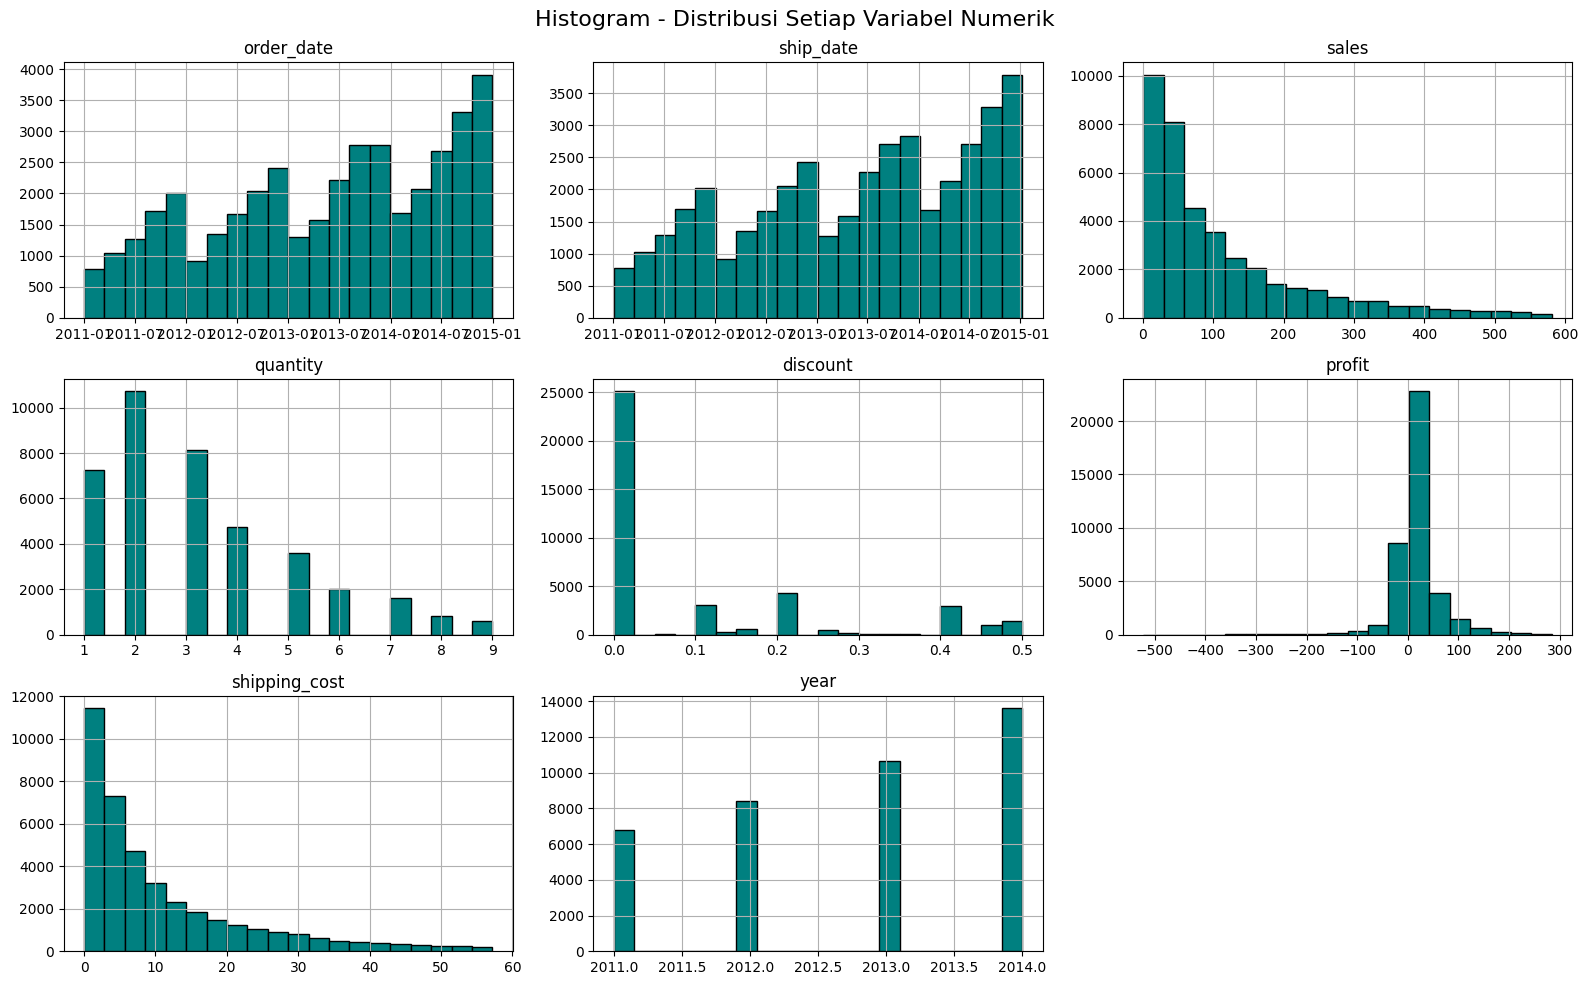

In [ ]:
# Histogram untuk distribusi data numerik
df_clean.hist(figsize=(16, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Histogram - Distribusi Setiap Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.show()

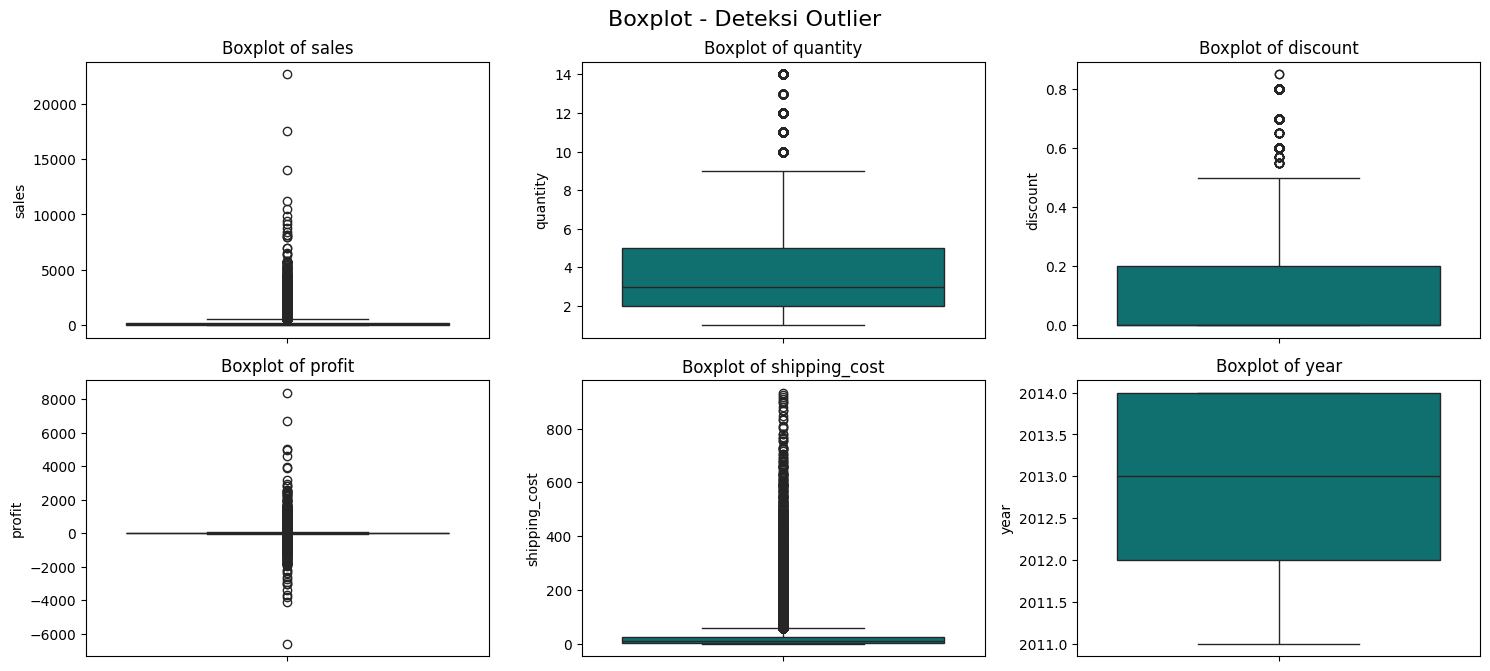

In [ ]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='teal')
    plt.title(f'Boxplot of {col}')
plt.suptitle('Boxplot - Deteksi Outlier', fontsize=16)
plt.tight_layout()
plt.show()

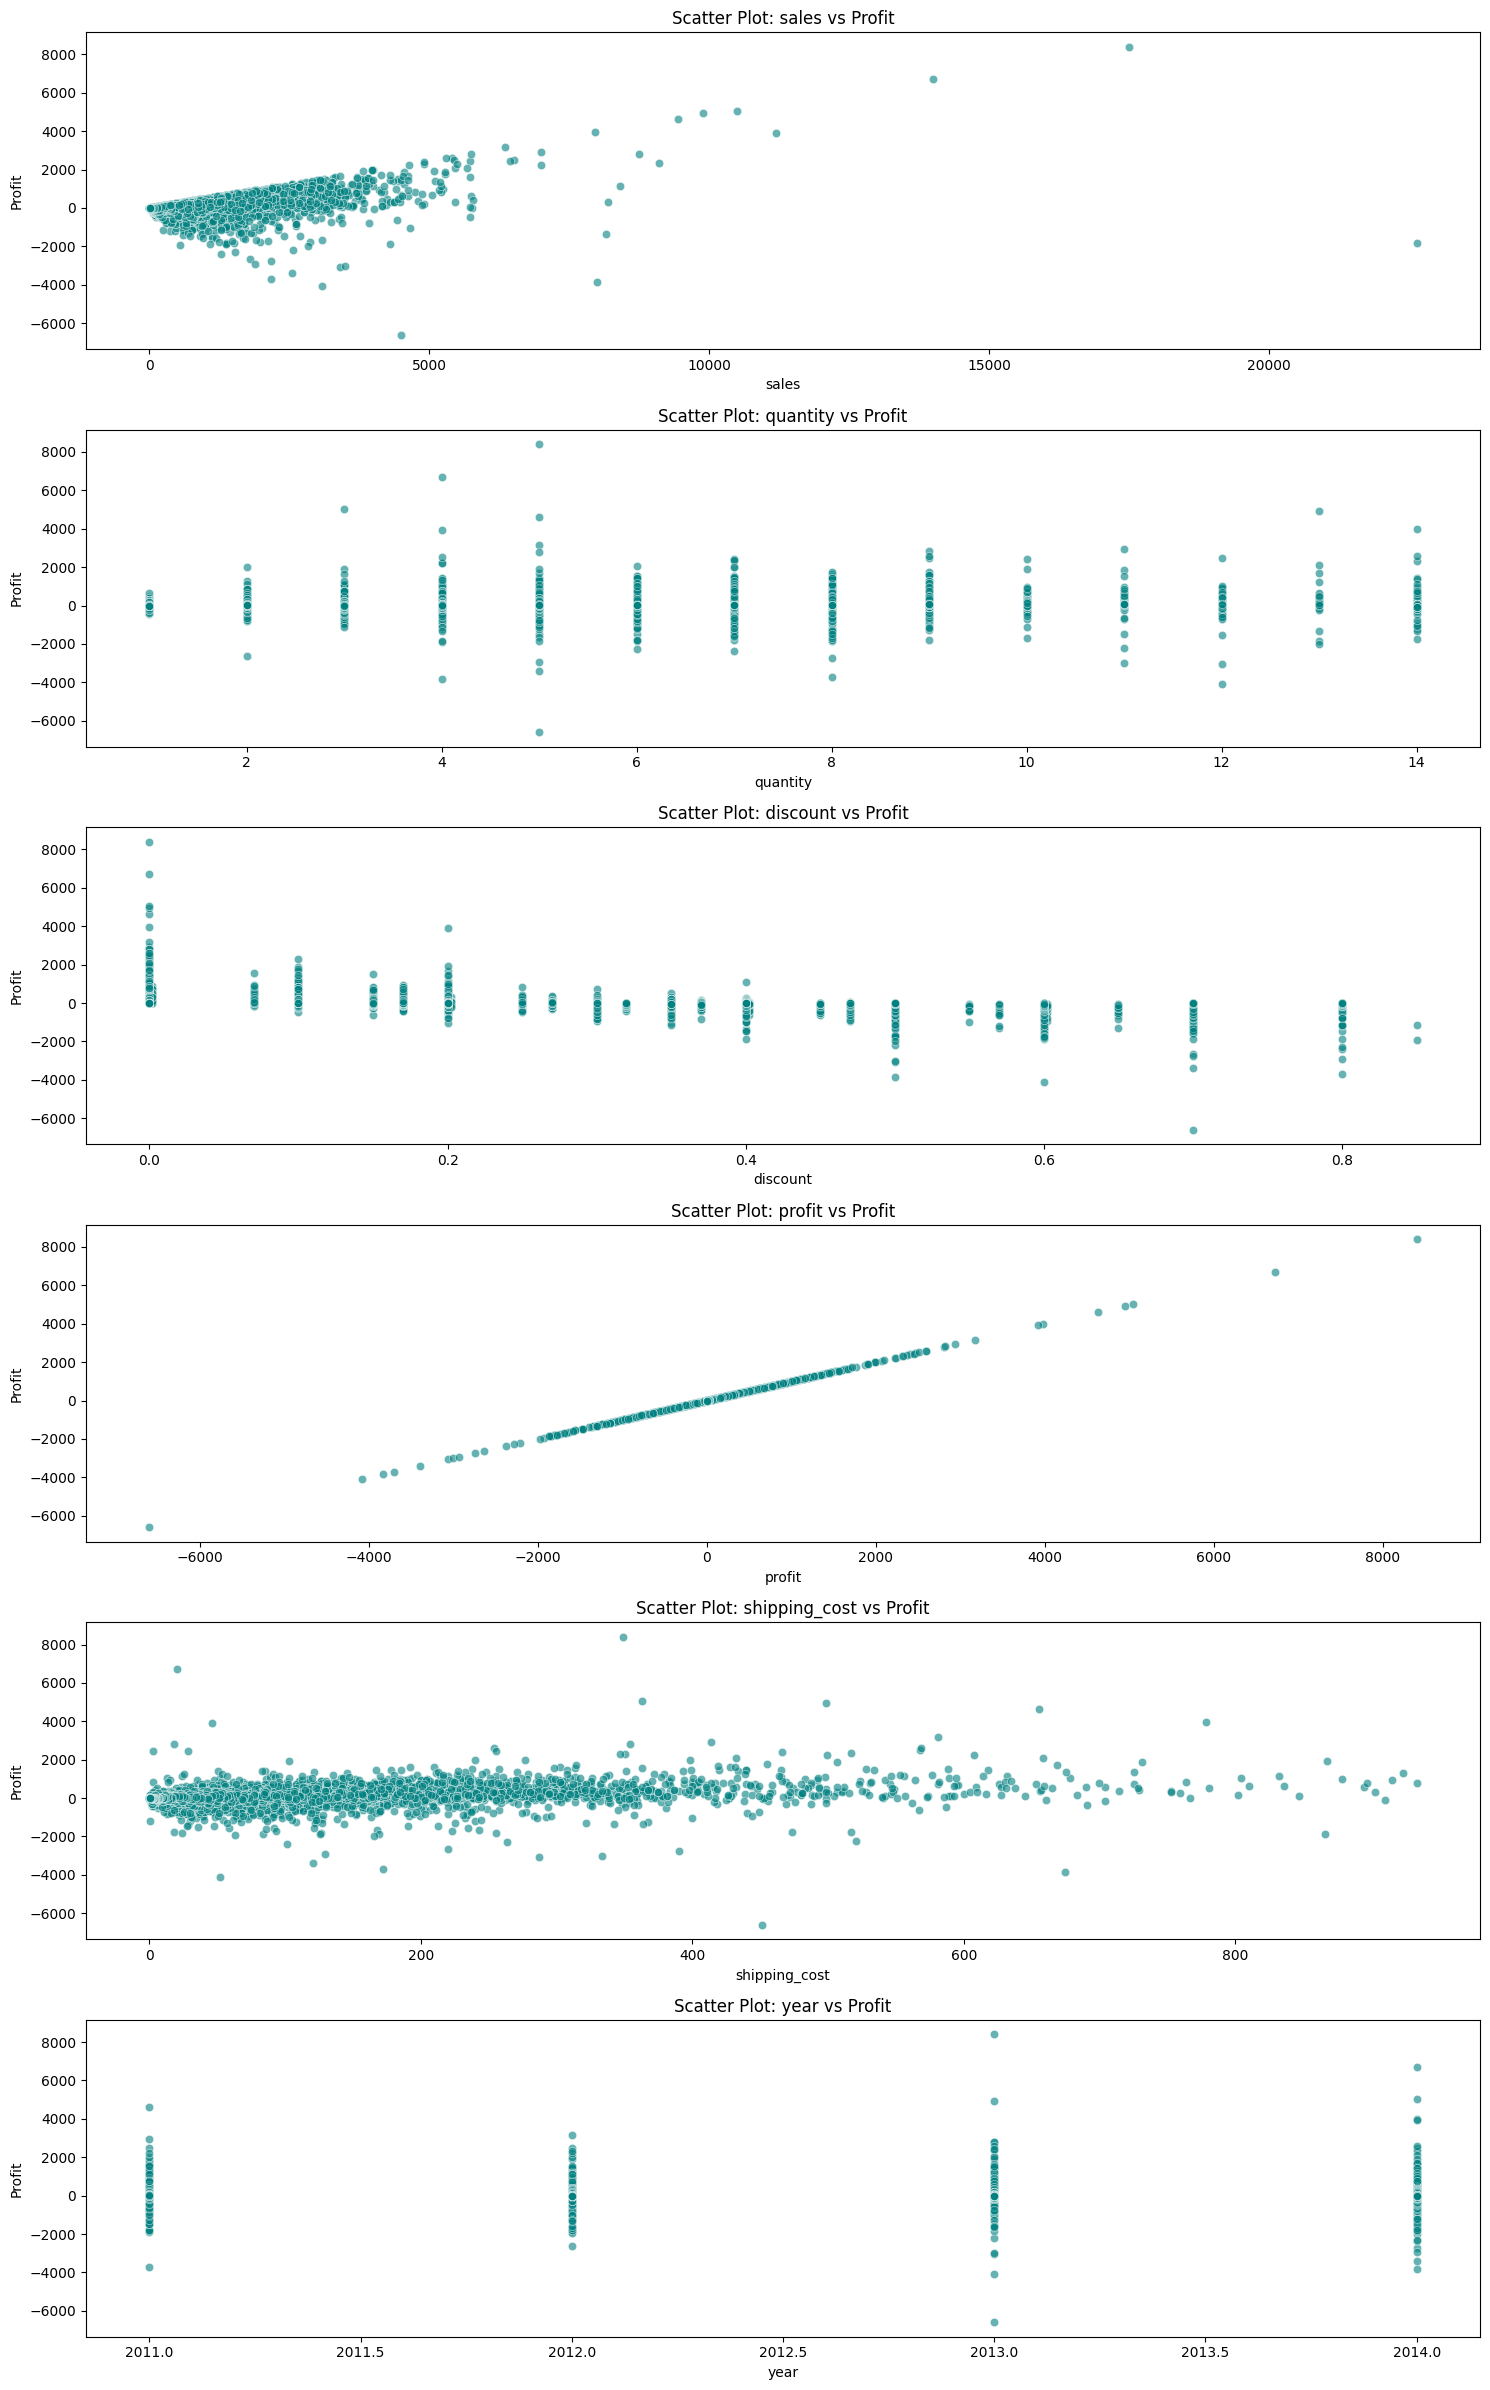

In [ ]:
# Scatterplot
plt.figure(figsize=(15, len(num_cols)*4))
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.scatterplot(x=df[col], y=df['profit'], color='teal', alpha=0.6)
    plt.title(f'Scatter Plot: {col} vs Profit', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Profit')
plt.tight_layout()
plt.show()

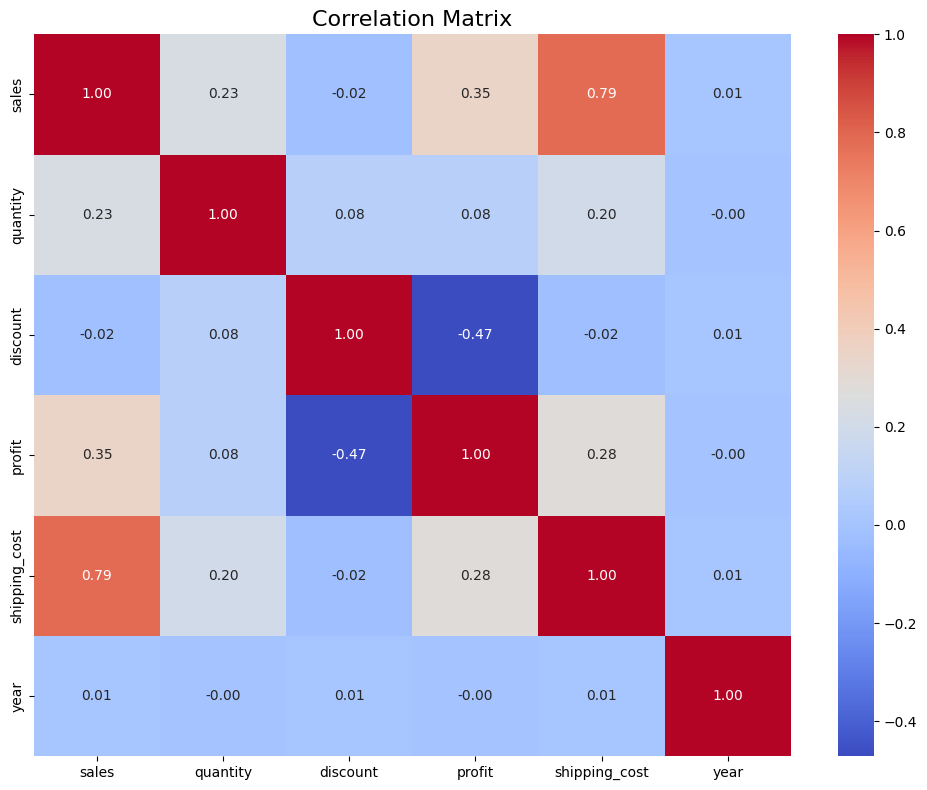

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df_clean.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# DATA PREPARATION

1. Menangani nilai yang hilang dengan metode yang sesuai (penghapusan atau imputasi).
2. Melakukan pengkodean untuk variabel kategorikal (misalnya: label encoding atau one-hot encoding).
3. Melakukan normalisasi atau standarisasi terhadap fitur numerik (jika diperlukan).
4. Membersihkan data dari duplikasi atau entri yang tidak konsisten.

## 1 || Handle Missing Values

In [ ]:
# Cek Missing Values
df_clean.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Keterangan:</font></h2>

* _Tidak ada data yang hilang_

In [ ]:
# Hapus Missing Values
df_clean.dropna(inplace=True)

<ipython-input-20-de23717dec2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [ ]:
# Cek Missing Values setelah dihapus
df_clean.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


## Tambah Fitur

In [ ]:
# Bikin fitur baru dari tanggal
df_clean['order_month'] = df['order_date'].dt.month       # bulan order (1-12)
df_clean['order_day'] = df['order_date'].dt.day           # tanggal order (1-31)
df_clean['order_weekday'] = df['order_date'].dt.weekday   # Senin=0, Minggu=6

# Selisih waktu kirim dalam hari
df_clean['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

# Tambah Fitur Baru
# Biaya pengiriman per item
df_clean['shipping_cost_per_item'] = df_clean['shipping_cost'] / df_clean['quantity']

# Hari akhir pekan (Sabtu = 5, Minggu = 6)
df_clean['is_weekend'] = df_clean['order_weekday'].apply(lambda x: 1 if x >= 5 else 0)

<ipython-input-22-9223edd08e60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_month'] = df['order_date'].dt.month       # bulan order (1-12)
<ipython-input-22-9223edd08e60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_day'] = df['order_date'].dt.day           # tanggal order (1-31)
<ipython-input-22-9223edd08e60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39492 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                39492 non-null  object        
 1   order_date              39492 non-null  datetime64[ns]
 2   ship_date               39492 non-null  datetime64[ns]
 3   ship_mode               39492 non-null  object        
 4   customer_name           39492 non-null  object        
 5   segment                 39492 non-null  object        
 6   state                   39492 non-null  object        
 7   country                 39492 non-null  object        
 8   market                  39492 non-null  object        
 9   region                  39492 non-null  object        
 10  product_id              39492 non-null  object        
 11  category                39492 non-null  object        
 12  sub_category            39492 non-null  object     

## 2 || Encoding & One-hot Encoding

In [ ]:
# Cek semua kolom bertipe objek/kategorikal
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['order_id', 'ship_mode', 'customer_name', 'segment', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'order_priority'],
      dtype='object')


In [ ]:
# Lihat jumlah nilai unik dari tiap kolom kategorikal
for col in categorical_cols:
    print(f"{col} : {df_clean[col].nunique()} unique values")

order_id : 21275 unique values
ship_mode : 4 unique values
customer_name : 795 unique values
segment : 3 unique values
state : 963 unique values
country : 137 unique values
market : 7 unique values
region : 13 unique values
product_id : 9065 unique values
category : 3 unique values
sub_category : 17 unique values
product_name : 3586 unique values
order_priority : 4 unique values


<!DOCTYPE html>
<html lang="id">
<head>
  <meta charset="UTF-8">
  <style>
    body {
      background-color: #1e1e1e;
      color: #ffffff;
      font-family: Arial, sans-serif;
      padding: 20px;
    }

    h2 {
      display: flex;
      align-items: center;
      color: #ffffff;
      margin-top: 40px;
    }

    h2::before {
      margin-right: 10px;
      font-size: 24px;
    }

    h2.onehot::before {
      content: '✅';
      color: #00ff99;
    }

    h2.buang::before {
      content: '❌';
      color: #ff4d4d;
    }

    table {
      width: 100%;
      border-collapse: collapse;
      margin-top: 20px;
      background-color: #2a2a2a;
    }

    th, td {
      border: 1px solid #444;
      padding: 10px;
      text-align: left;
    }

    th {
      background-color: #333;
    }

    code {
      background-color: #3a3a3a;
      padding: 3px 6px;
      border-radius: 4px;
      color: #ffffff;
    }

    .check {
      color: #00ff99;
      font-size: 18px;
      margin-left: 5px;
    }

    .cross {
      color: #ff4d4d;
      font-size: 18px;
      margin-left: 5px;
    }
  </style>
</head>
<body>

  <h4 class="onehot">Kolom yang Perlu Di-One-Hot Encoding</h4>

  <table>
    <thead>
      <tr>
        <th>Kolom</th>
        <th>Unique</th>
        <th>Alasan</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><code>ship_mode</code></td>
        <td>4</td>
        <td>Sedikit → One-Hot <span class="check">✅</span></td>
      </tr>
      <tr>
        <td><code>segment</code></td>
        <td>3</td>
        <td>Sedikit → One-Hot <span class="check">✅</span></td>
      </tr>
      <tr>
        <td><code>market</code></td>
        <td>7</td>
        <td>Masih sedikit → One-Hot <span class="check">✅</span></td>
      </tr>
      <tr>
        <td><code>region</code></td>
        <td>13</td>
        <td>Masih aman → One-Hot <span class="check">✅</span></td>
      </tr>
      <tr>
        <td><code>category</code></td>
        <td>3</td>
        <td>Cocok banget One-Hot <span class="check">✅</span></td>
      </tr>
      <tr>
        <td><code>sub_category</code></td>
        <td>17</td>
        <td>Masih masuk akal → One-Hot <span class="check">✅</span></td>
      </tr>
      <tr>
        <td><code>order_priority</code></td>
        <td>4</td>
        <td>Cocok One-Hot <span class="check">✅</span></td>
      </tr>
    </tbody>
  </table>

  <h4 class="buang">Kolom yang Dibuang (Terlalu Unik / Gak Berguna Buat Prediksi)</h4>

  <table>
    <thead>
      <tr>
        <th>Kolom</th>
        <th>Unique</th>
        <th>Alasan Buang</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><code>order_id</code></td>
        <td>21275</td>
        <td>ID acak → buang <span class="cross">❌</span></td>
      </tr>
      <tr>
        <td><code>order_date</code></td>
        <td>1423</td>
        <td>Bisa diolah → atau buang dulu <span class="cross">❌</span></td>
      </tr>
      <tr>
        <td><code>ship_date</code></td>
        <td>1464</td>
        <td>Sama kayak atas <span class="cross">❌</span></td>
      </tr>
      <tr>
        <td><code>customer_name</code></td>
        <td>795</td>
        <td>Nama orang → buang <span class="cross">❌</span></td>
      </tr>
      <tr>
        <td><code>state</code></td>
        <td>963</td>
        <td>Terlalu banyak → buang <span class="cross">❌</span></td>
      </tr>
      <tr>
        <td><code>country</code></td>
        <td>137</td>
        <td>Agak banyak → buang <span class="cross">❌</span></td>
      </tr>
      <tr>
        <td><code>product_id</code></td>
        <td>9065</td>
        <td>Terlalu unik → buang <span class="cross">❌</span></td>
      </tr>
      <tr>
        <td><code>product_name</code></td>
        <td>3586</td>
        <td>Sama → buang <span class="cross">❌</span></td>
      </tr>
    </tbody>
  </table>

</body>
</html>

<h4> Kolom Numerik (Tidak Diperlukan Encoding)</h4>
<td><code>sales</code></td>,
<td><code>quantity</code><td>,
<td><code>discount</code><td>,
<td><code>profit</code><td>,
<td><code>shipping_cost</code><td>,
<td><code>year</code><td>.

In [ ]:
# Buang Kolom yang Tidakk Dipakai
kolom_dibuang = [
    'order_id', 'order_date', 'ship_date',
    'customer_name', 'state', 'country',
    'product_id', 'product_name'
]
df_model = df_clean.drop(columns=kolom_dibuang)

In [ ]:
# One-Hot Encoding untuk Kolom Kategori
# Komputer gak ngerti tulisan, jadi kolom kategori kita ubah ke angka 0/1
kolom_kategori = [
    'ship_mode', 'segment', 'market',
    'region', 'category', 'sub_category',
    'order_priority'
]

# Pakai One-Hot Encoding
df_encoded = pd.get_dummies(df_model, columns=kolom_kategori)

In [ ]:
# Menampilkan informasi setelah one-hot encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39492 entries, 0 to 51289
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sales                     39492 non-null  float64
 1   quantity                  39492 non-null  int64  
 2   discount                  39492 non-null  float64
 3   profit                    39492 non-null  float64
 4   shipping_cost             39492 non-null  float64
 5   year                      39492 non-null  int64  
 6   order_month               39492 non-null  int32  
 7   order_day                 39492 non-null  int32  
 8   order_weekday             39492 non-null  int32  
 9   shipping_days             39492 non-null  int64  
 10  shipping_cost_per_item    39492 non-null  float64
 11  is_weekend                39492 non-null  int64  
 12  ship_mode_First Class     39492 non-null  bool   
 13  ship_mode_Same Day        39492 non-null  bool   
 14  ship_mode_S

In [ ]:
# Menampilkan 5 data awal
df_encoded.head(5)

,sales,quantity,discount,profit,shipping_cost,year,order_month,order_day,order_weekday,shipping_days,...,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium
0,408.0,2,0.0,106.140,35.46,2011,1,1,5,5,...,False,False,False,True,False,False,False,False,False,True
1,120.0,3,0.1,36.036,9.72,2011,1,1,5,7,...,False,False,False,False,True,False,False,False,False,True
2,66.0,4,0.0,29.640,8.17,2011,1,1,5,4,...,False,False,False,True,False,False,False,True,False,False
3,45.0,3,0.5,-26.055,4.82,2011,1,1,5,4,...,False,True,False,False,False,False,False,True,False,False
4,114.0,5,0.1,37.770,4.70,2011,1,1,5,7,...,False,False,False,False,False,False,False,False,False,True


## 3 || Normalisasi/ standarisasi fitur numerik (jika diperlukan)

In [ ]:
# Kolom numerik yang di skalakan
numeric_cols = ['sales', 'quantity', 'discount', 'shipping_cost', 'order_month', 'order_day', 'order_weekday', 'shipping_days']

# Simpan kolom target
y = df_encoded['profit']  # Target
X = df_encoded.drop(columns='profit') # fitur

# Standarisasi
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

## 4 || Handle duplikasi dataset

In [ ]:
# Cek Duplikasi data
df_encoded.duplicated().sum()

np.int64(0)

In [ ]:
# Menampilkan Baris Duplikat
df_encoded[df.duplicated()]

<ipython-input-32-62810b207e7d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_encoded[df.duplicated()]


,sales,quantity,discount,profit,shipping_cost,year,order_month,order_day,order_weekday,shipping_days,...,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium


In [ ]:
# Hapus Baris yang Duplikat
df_encoded.drop_duplicates(inplace=True)

In [ ]:
# Cek Duplikasi data Setelah dihapus
df_encoded.duplicated().sum()

np.int64(0)

# PERMODELAN (MODELING)

Supervised Learning menggunakan algoritma machine learning Random Forest Klasifikasi.
* “Transaksi ini untung atau rugi?”.

## Buat Kolom Target profit_class

In [ ]:
# Buat Kolom Target profit_class
df_encoded['profit_class'] = df_encoded['profit'].apply(lambda x: 1 if x > 0 else 0)

Penjelasan:
* 1 = Untung
* 0 = Rugi

## Pisahkan Fitur dan Target Baru

In [ ]:
# Pisahkan Fitur dan Target Baru
numeric_cols = ['sales', 'quantity', 'discount', 'shipping_cost',
                'order_month', 'order_day', 'order_weekday', 'shipping_days']

X = df_encoded[numeric_cols]  # hanya 8 fitur numerik
y = df_encoded['profit_class']

**Keterangan**: <br>
mengganti target dari profit (numerik) ke profit_class (klasifikasi biner: 1 = untung, 0 = rugi), dan memastikan bahwa kolom profit dan profit_class tidak dipakai sebagai fitur prediktor.

fiturnya: ['sales', 'quantity', 'discount', 'shipping_cost',                'order_month', 'order_day', 'order_weekday', 'shipping_days']


## Bagi data jadi data latih & data uji

In [ ]:
# Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Penjelasan:**

Split data jadi:
* 80% buat latih model, 20% buat ngetes akurasi model
* random_state=42 → supaya hasilnya konsisten tiap kali dijalankan

## Latih model Random Forest Klasifikasi

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Penjelasan:**
* n_estimators=100: Jumlah pohon yang dibuat (semakin banyak bisa lebih akurat)
* fit(...): Model dilatih pakai data X_train dan y_train

# PREDIKSI & EVALUASI MODEL (EVALUATION)

## Evaluasi Akurasi

In [ ]:
# Buat prediksi pada data uji
y_pred = clf.predict(X_test)

In [ ]:
# Evaluasi Akurasi
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9164451196353969


**Penjelasan:** <br>
Model ini benar memprediksi sekitar 91.6% dari seluruh data uji (baik yang untung maupun rugi).

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 979  476]
 [ 184 6260]]


**Penjelasan:**
* True Negative (TN) = 979
<br>Data sebenarnya rugi dan model memprediksi rugi → benar.

* False Positive (FP) = 476
<br>Data sebenarnya rugi tapi model prediksi untung → salah prediksi (ini Type I error).

* False Negative (FN) = 184
<br>Data sebenarnya untung tapi model prediksi rugi → salah prediksi (ini Type II error).

* True Positive (TP) = 6260
<br>Data sebenarnya untung dan model prediksi untung → benar.

In [ ]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75      1455
           1       0.93      0.97      0.95      6444

    accuracy                           0.92      7899
   macro avg       0.89      0.82      0.85      7899
weighted avg       0.91      0.92      0.91      7899



* Model sangat bagus dalam mendeteksi data yang untung (kelas 1):
* Precision 93% → Dari semua prediksi "untung", 93% benar.
* Recall 97% → Dari semua data yang benar-benar "untung", 97% berhasil ditemukan model.
* F1-score 95% → Gabungan antara precision dan recall-nya sangat baik.
* Artinya: Model sangat andal dalam mendeteksi kondisi untung.

* Model kurang optimal dalam mendeteksi rugi (kelas 0):
* Precision 84% → Cukup baik, tapi masih salah prediksi 17% dari yang seharusnya rugi.
* Recall 67% → Hanya 67% dari data yang benar-benar rugi berhasil dikenali model.
* F1-score 75% → Masih oke, tapi bisa ditingkatkan.
* Artinya: Model masih sering meloloskan data rugi sebagai untung, ini bisa berisiko kalau kamu ingin menghindari kerugian.

In [ ]:
# ROC AUC (untuk klasifikasi biner)
from sklearn.metrics import roc_auc_score

y_proba = clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc)

ROC AUC Score: 0.9239459813438965


**Penjelasan**:<br> nilai ROC AUC Score sebesar 0.923. Ini menunjukkan bahwa model mampu memprediksi dengan tingkat akurasi yang tinggi, sehingga layak digunakan untuk pengambilan keputusan atau prediksi lebih lanjut.

## Cek Feature Importance-nya

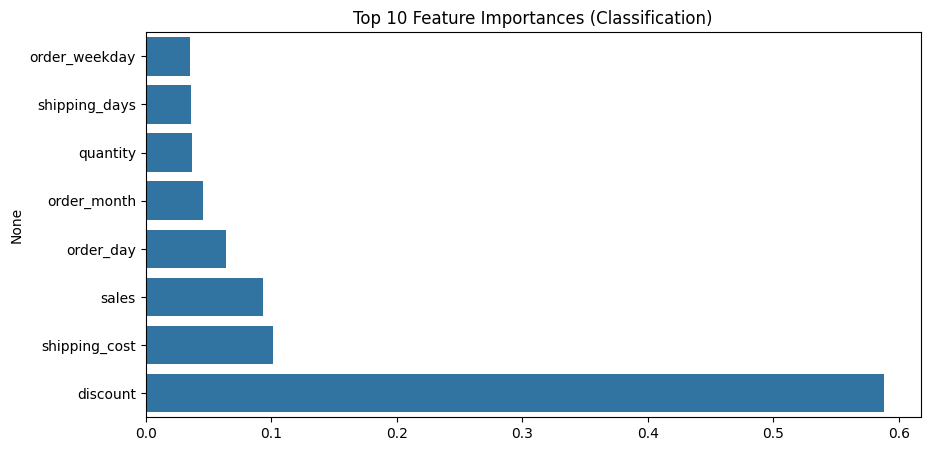

In [ ]:
# Cek Feature Importance-nya

importances = clf.feature_importances_
feat_names = X.columns
sorted_idx = importances.argsort()[-10:]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_idx], y=feat_names[sorted_idx])
plt.title("Top 10 Feature Importances (Classification)")
plt.show()


# PELAPORAN HASIL

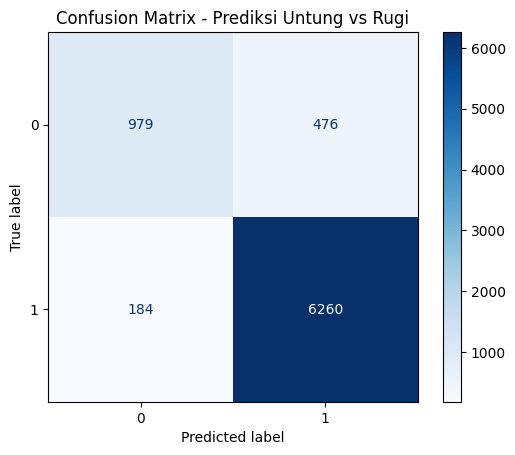

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Prediksi Untung vs Rugi")
plt.show()

Penjelasan:
* Baris: label asli (ground truth)
* Kolom: prediksi model
* 979 transaksi rugi terdeteksi dengan benar (True Negative)
* 476 transaksi rugi salah dikira untung (False Positive)
* 6260 transaksi untung benar ditebak (True Positive)
* 184 transaksi untung salah dikira rugi (False Negative)

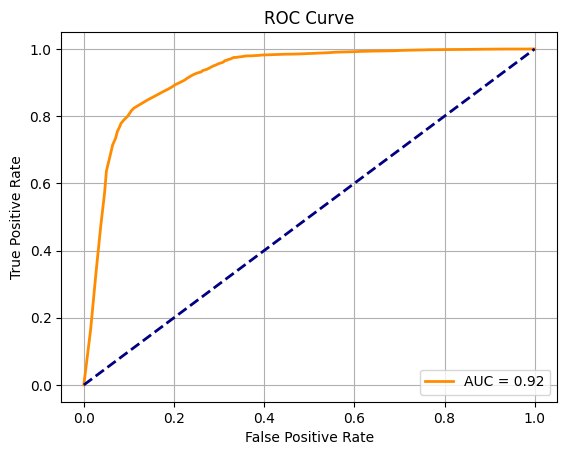

In [ ]:
#  ROC Curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Penjelasan:
<br></br>
AUC = 0.92 (Area Under the Curve)
Ini berarti model mampu membedakan antara transaksi untung dan rugi dengan sangat baik. Nilai AUC di atas 0.9 tergolong excellent performance.

<!DOCTYPE html>
<html lang="id">
<head>
  <meta charset="UTF-8">
  <style>
    body {
      font-family: Arial, sans-serif;
      background-color: #1e1e1e;
      color: #ffffff;
      padding: 30px;
      font-size: 22px;
    }
    h2 {
      display: flex;
      align-items: center;
      font-size: 28px;
    }
    h2::before {
      content: "📄";
      margin-right: 10px;
    }
    table {
      width: 100%;
      border-collapse: collapse;
      margin-top: 20px;
      background-color: #2c2c2c;
    }
    th, td {
      padding: 26px;
      text-align: left;
      border-bottom: 1px solid #444;
      font-size: 52px;
    }
    th {
      background-color: #3a3a3a;
    }
  </style>
</head>
<body>

  <h3>Interpretasi Performa Model</h3>
  <table>
    <tr>
      <th>Metrik</th>
      <th>Nilai</th>
      <th>Artinya</th>
    </tr>
    <tr>
      <td>Accuracy</td>
      <td>91%</td>
      <td>91% prediksi model sudah sesuai kenyataan</td>
    </tr>
    <tr>
      <td>Precision (Rugi)</td>
      <td>84%</td>
      <td>Dari prediksi "rugi", 84% benar-benar rugi</td>
    </tr>
    <tr>
      <td>Recall (Rugi)</td>
      <td>67%</td>
      <td>Dari semua yang benar-benar rugi, hanya 67% yang terdeteksi oleh model</td>
    </tr>
    <tr>
      <td>Precision (Untung)</td>
      <td>93%</td>
      <td>Hampir semua prediksi "untung" akurat</td>
    </tr>
    <tr>
      <td>Recall (Untung)</td>
      <td>97%</td>
      <td>Model berhasil mendeteksi hampir semua transaksi untung</td>
    </tr>
    <tr>
      <td>AUC Score</td>
      <td>0.92</td>
      <td>Model sangat baik dalam membedakan dua kelas</td>
    </tr>
  </table>

</body>
</html>

<h3> Kelebihan dan Keterbatasan </h3>
<h4> Kelebihan: </h4>

* Akurasi tinggi (91%)
* AUC score sangat baik (0.92)
* Deteksi “untung” sangat presisi dan andal
* Model cepat dilatih, cocok untuk implementasi praktis

<h4> Keterbatasan: </h4>

* Masih cukup banyak transaksi rugi yang salah dikira untung (476 kasus)

# Load Model

In [ ]:
import joblib

joblib.dump(clf, 'model.pkl')  # Simpan SETELAH model dilatih

['model.pkl']

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2xIWyoCHvf7gdYd6g8AAC9qoZXm_s2XgMQ8qwDNfrLcCeoVG

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
# Simpan dataframe hasil preprocessing (df_encoded)
df_encoded_clean = df_encoded[numeric_cols + ['profit_class']]
df_encoded_clean.to_csv("data_encoded.csv", index=False)

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load data
df = pd.read_csv("data_encoded.csv")
numeric_cols = ['sales', 'quantity', 'discount', 'shipping_cost', 'order_month', 'order_day', 'order_weekday', 'shipping_days']
X = df[numeric_cols]
y = df['profit_class']

model = RandomForestClassifier()
model.fit(X, y)

st.set_page_config(page_title="Dashboard Prediksi Untung/Rugi", layout="centered")

st.title("📈 Dashboard Prediksi Untung/ Rugi Berdasarkan Transaksi Customer")
st.markdown("Selamat Datang di **Dashboard Prediksi Untung/ Rugi**. Dashboard ini menggunakan model **RandomForest Classification** untuk memprediksi kemungkinan transaksi customer menghasilkan **untung atau rugi** berdasarkan fitur-fitur seperti 'sales', 'quantity', 'discount', 'shipping_cost', 'order_month', 'order_day', 'order_weekday', 'shipping_days' dan status.")

st.markdown("### 📊 Dataset")

jumlah_data = len(df)
jumlah_untung = (df['profit_class'] == 1).sum()
jumlah_rugi = (df['profit_class'] == 0).sum()

st.markdown(f"""
<div style="text-align: left;">
    <h6 style="margin-bottom: 14px;">Dataset berisi informasi tentang 'sales', 'quantity', 'discount', 'shipping_cost', 'order_month', 'order_day', 'order_weekday', 'shipping_days' dan status untung/rugi (0: Rugi, 1: Untung).</h6>
    <table style="width:100%; font-size: 14px; text-align: center;">
        <tr>
            <th>Jumlah Data</th>
            <th>Customer Untung</th>
            <th>Customer Rugi</th>
        </tr>
        <tr>
            <td>{jumlah_data}</td>
            <td style="color:green;">{jumlah_untung}</td>
            <td style="color:red;">{jumlah_rugi}</td>
        </tr>
    </table>
</div>
""", unsafe_allow_html=True)

st.subheader("🔍 Distribusi Status Untung/Rugi")
pie_fig = px.pie(
    names=['Untung', 'Rugi'],
    values=[jumlah_untung, jumlah_rugi],
    color_discrete_sequence=['green', 'red'],
    title="Distribusi Untung vs Rugi"
)
st.plotly_chart(pie_fig, use_container_width=True)

st.subheader("🤖 Prediksi Untung/Rugi")
user_input = [st.number_input(col, value=float(df[col].mean())) for col in numeric_cols]

if st.button("Prediksi"):
    input_array = np.array(user_input).reshape(1, -1)
    prob = model.predict_proba(input_array)[0]
    pred = model.predict(input_array)[0]

    st.subheader("📢 Hasil Prediksi")
    if pred == 1:
        st.success(f"Prediksi: **Untung** dengan probabilitas {prob[1]*100:.2f}%")
    else:
        st.error(f"Prediksi: **Rugi** dengan probabilitas {prob[0]*100:.2f}%")

    st.subheader("🔬 Probabilitas Prediksi")
    bar_fig = go.Figure(data=[
        go.Bar(x=["Rugi", "Untung"], y=prob, marker_color=['red', 'green'])
    ])
    bar_fig.update_layout(title="Probabilitas Prediksi", yaxis_title="Probabilitas")
    st.plotly_chart(bar_fig, use_container_width=True)

    st.subheader("📈 ROC Curve")
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    roc_fig = go.Figure()
    roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve', line=dict(color='blue')))
    roc_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
    roc_fig.update_layout(
        title=f"ROC Curve (AUC = {roc_auc:.2f})",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        showlegend=True
    )
    st.plotly_chart(roc_fig, use_container_width=True)

    st.subheader("💡 Rekomendasi")
    if pred == 1:
        st.markdown("- ✅ Lanjutkan strategi saat ini.\n- 🚚 Tingkatkan efisiensi pengiriman untuk margin lebih besar.")
    else:
        st.markdown("- ⚠️ Evaluasi diskon dan biaya pengiriman.\n- 🎯 Optimalkan strategi pemasaran untuk segmen terkait.")


Writing app.py


In [ ]:
from pyngrok import ngrok
import threading
import os
import time # Import the time module

# Kill any existing ngrok tunnels
ngrok.kill()
time.sleep(2) # Give ngrok time to shut down existing tunnels

def run_streamlit():
  os.system("streamlit run app.py --server.port 8501")
thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr='8501')
print(public_url)

NgrokTunnel: "https://2e49-34-138-31-132.ngrok-free.app" -> "http://localhost:8501"
